In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

In [3]:
data_df = pd.read_csv('Score_df.csv')
data_df.head(3)

,dataset,filename,kf_ease_avg,spache_avg,kf_ease,spache_ease,kf_ease_total_avg,spache_ease_total_avg,plain_utterances,plain_utterances_str
0,English_Bilingual_Grade2_Audio,11221425.cha,102.705322,2.341721,"[103.625, 115.13000000000002, 103.54, 116.1450...","[3.1089999999999995, 1.8259999999999998, 1.966...",100.527452,2.591364,['the boy and the dog were looking at the frog...,the boy and the dog were looking at the frog ....
1,English_Bilingual_Grade2_Audio,11222222.cha,108.029452,2.044024,"[117.16000000000003, 103.70000000000002, 103.0...","[1.544, 2.1079999999999997, 3.0545714285714287...",106.310333,2.093089,"['the boy went to sleep .', 'and the frog jump...",the boy went to sleep . and the frog jumped ou...
2,English_Bilingual_Grade2_Audio,11222306.cha,103.385723,2.438240,"[103.00500000000001, 103.04428571428575, 103.7...","[3.2476666666666665, 3.0545714285714287, 2.107...",100.953344,2.554833,['one night the boy and the dog were looking a...,one night the boy and the dog were looking at ...


In [4]:
grouped_df = data_df.groupby('dataset').describe()
grouped_df

kf_ease_avg                                   \
                                       count        mean       std        min   
dataset                                                                         
English_Bilingual_Grade2_Audio          12.0  104.843785  2.659873  99.970278   
English_Bilingual_Grade2_NoAudio        33.0  104.530155  3.070343  96.007767   
English_Bilingual_Grade5_Audio           7.0  100.496261  2.608377  96.003082   
English_Bilingual_Grade5_NoAudio        47.0  101.045675  3.841589  87.996249   
English_Monolingual_Grade2              19.0  104.223787  5.622205  83.934286   
English_Monolingual_Grade5              29.0  103.843160  2.690424  99.079020   

                                                                      \
                                         25%         50%         75%   
dataset                                                                
English_Bilingual_Grade2_Audio    103.245395  104.225593  107.674846   
English_Bilingual_Grade2_NoAudio  103.155950  104.779628  106.057552   
English_Bilingual_Grade5_Audio     99.311189  100.645713  102.405280   
English_Bilingual_Grade5_NoAudio   99.312477  101.818044  103.538484   
English_Monolingual_Grade2        103.316357  104.589411  106.917925   
English_Monolingual_Grade5        102.418058  103.687221  105.314469   

                                             spache_avg            ...  \
                                         max      count      mean  ...   
dataset                                                            ...   
English_Bilingual_Grade2_Audio    108.664593       12.0  2.144566  ...   
English_Bilingual_Grade2_NoAudio  111.041046       33.0  2.174599  ...   
English_Bilingual_Grade5_Audio    103.392096        7.0  2.556656  ...   
English_Bilingual_Grade5_NoAudio  109.131355       47.0  2.435127  ...   
English_Monolingual_Grade2        111.744751       19.0  2.202065  ...   
English_Monolingual_Grade5        111.244307       29.0  2.341804  ...   

                                 kf_ease_total_avg              \
                                               75%         max   
dataset                                                          
English_Bilingual_Grade2_Audio          104.570261  106.310333   
English_Bilingual_Grade2_NoAudio        104.816477  108.365316   
English_Bilingual_Grade5_Audio          101.945761  102.594906   
English_Bilingual_Grade5_NoAudio        101.831634  106.357842   
English_Monolingual_Grade2              103.834283  109.769692   
English_Monolingual_Grade5              103.765556  108.345523   

                                 spache_ease_total_avg                      \
                                                 count      mean       std   
dataset                                                                      
English_Bilingual_Grade2_Audio                    12.0  2.293698  0.190345   
English_Bilingual_Grade2_NoAudio                  33.0  2.293988  0.214050   
English_Bilingual_Grade5_Audio                     7.0  2.604765  0.260236   
English_Bilingual_Grade5_NoAudio                  47.0  2.540860  0.245930   
English_Monolingual_Grade2                        19.0  2.340891  0.225602   
English_Monolingual_Grade5                        29.0  2.476386  0.275863   

                                                                          \
                                       min       25%       50%       75%   
dataset                                                                    
English_Bilingual_Grade2_Audio    1.964895  2.162901  2.283985  2.440306   
English_Bilingual_Grade2_NoAudio  1.986543  2.120961  2.249201  2.432203   
English_Bilingual_Grade5_Audio    2.163513  2.520293  2.656787  2.668187   
English_Bilingual_Grade5_NoAudio  2.153861  2.415307  2.509815  2.653716   
English_Monolingual_Grade2        1.936027  2.234934  2.323583  2.488718   
English_Monolingual_Grade5        2.012312  2.297929  2.427095  2.688801   

    

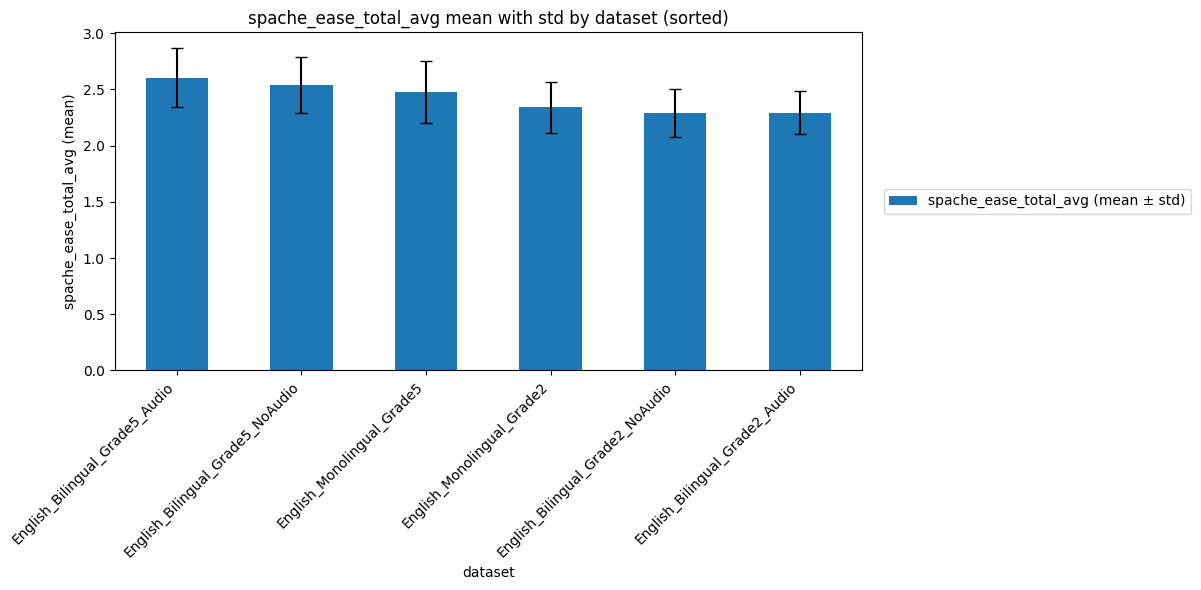

In [7]:
def make_barplot(column_name, ascending=False):
    means = grouped_df[(column_name, 'mean')]
    stds = grouped_df[(column_name, 'std')]
    df_plot = pd.DataFrame({'mean': means, 'std': stds}).sort_values('mean', ascending=ascending)

    fig, ax = plt.subplots(figsize=(14,6))
    df_plot['mean'].plot(kind='bar', yerr=df_plot['std'], capsize=4, ax=ax, color='C0', label=f'{column_name} (mean ± std)')

    ax.set_ylabel(f'{column_name} (mean)')
    ax.set_title(f'{column_name} mean with std by dataset (sorted)')
    ax.set_xticklabels(df_plot.index, rotation=45, ha='right')

    ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


# Sort descending by default (highest mean first). Set ascending=True for lowest-first.

make_barplot("spache_ease_total_avg", ascending=False)

In [8]:
import ast
total_vals = []
names = []
groups = []
for name, grp in data_df.groupby('dataset'):
    flat = []
    for y in grp['spache_ease']:
        try:
            vals = ast.literal_eval(y)
        except Exception:
            continue
        if not isinstance(vals, (list, tuple)):
            continue
        for v in vals:
            try:
                flat.append(float(v))
            except Exception:
                pass
    names.append(name)
    total_vals.append(flat)
    groups.append((name, np.array(flat)))

# convenient lookups
group_to_vals = dict(groups)
flat_group_vals = [v for lst in total_vals for v in lst]
    


In [9]:
data_df.groupby('dataset').describe()

kf_ease_avg                                   \
                                       count        mean       std        min   
dataset                                                                         
English_Bilingual_Grade2_Audio          12.0  104.843785  2.659873  99.970278   
English_Bilingual_Grade2_NoAudio        33.0  104.530155  3.070343  96.007767   
English_Bilingual_Grade5_Audio           7.0  100.496261  2.608377  96.003082   
English_Bilingual_Grade5_NoAudio        47.0  101.045675  3.841589  87.996249   
English_Monolingual_Grade2              19.0  104.223787  5.622205  83.934286   
English_Monolingual_Grade5              29.0  103.843160  2.690424  99.079020   

                                                                      \
                                         25%         50%         75%   
dataset                                                                
English_Bilingual_Grade2_Audio    103.245395  104.225593  107.674846   
English_Bilingual_Grade2_NoAudio  103.155950  104.779628  106.057552   
English_Bilingual_Grade5_Audio     99.311189  100.645713  102.405280   
English_Bilingual_Grade5_NoAudio   99.312477  101.818044  103.538484   
English_Monolingual_Grade2        103.316357  104.589411  106.917925   
English_Monolingual_Grade5        102.418058  103.687221  105.314469   

                                             spache_avg            ...  \
                                         max      count      mean  ...   
dataset                                                            ...   
English_Bilingual_Grade2_Audio    108.664593       12.0  2.144566  ...   
English_Bilingual_Grade2_NoAudio  111.041046       33.0  2.174599  ...   
English_Bilingual_Grade5_Audio    103.392096        7.0  2.556656  ...   
English_Bilingual_Grade5_NoAudio  109.131355       47.0  2.435127  ...   
English_Monolingual_Grade2        111.744751       19.0  2.202065  ...   
English_Monolingual_Grade5        111.244307       29.0  2.341804  ...   

                                 kf_ease_total_avg              \
                                               75%         max   
dataset                                                          
English_Bilingual_Grade2_Audio          104.570261  106.310333   
English_Bilingual_Grade2_NoAudio        104.816477  108.365316   
English_Bilingual_Grade5_Audio          101.945761  102.594906   
English_Bilingual_Grade5_NoAudio        101.831634  106.357842   
English_Monolingual_Grade2              103.834283  109.769692   
English_Monolingual_Grade5              103.765556  108.345523   

                                 spache_ease_total_avg                      \
                                                 count      mean       std   
dataset                                                                      
English_Bilingual_Grade2_Audio                    12.0  2.293698  0.190345   
English_Bilingual_Grade2_NoAudio                  33.0  2.293988  0.214050   
English_Bilingual_Grade5_Audio                     7.0  2.604765  0.260236   
English_Bilingual_Grade5_NoAudio                  47.0  2.540860  0.245930   
English_Monolingual_Grade2                        19.0  2.340891  0.225602   
English_Monolingual_Grade5                        29.0  2.476386  0.275863   

                                                                          \
                                       min       25%       50%       75%   
dataset                                                                    
English_Bilingual_Grade2_Audio    1.964895  2.162901  2.283985  2.440306   
English_Bilingual_Grade2_NoAudio  1.986543  2.120961  2.249201  2.432203   
English_Bilingual_Grade5_Audio    2.163513  2.520293  2.656787  2.668187   
English_Bilingual_Grade5_NoAudio  2.153861  2.415307  2.509815  2.653716   
English_Monolingual_Grade2        1.936027  2.234934  2.323583  2.488718   
English_Monolingual_Grade5        2.012312  2.297929  2.427095  2.688801   

    

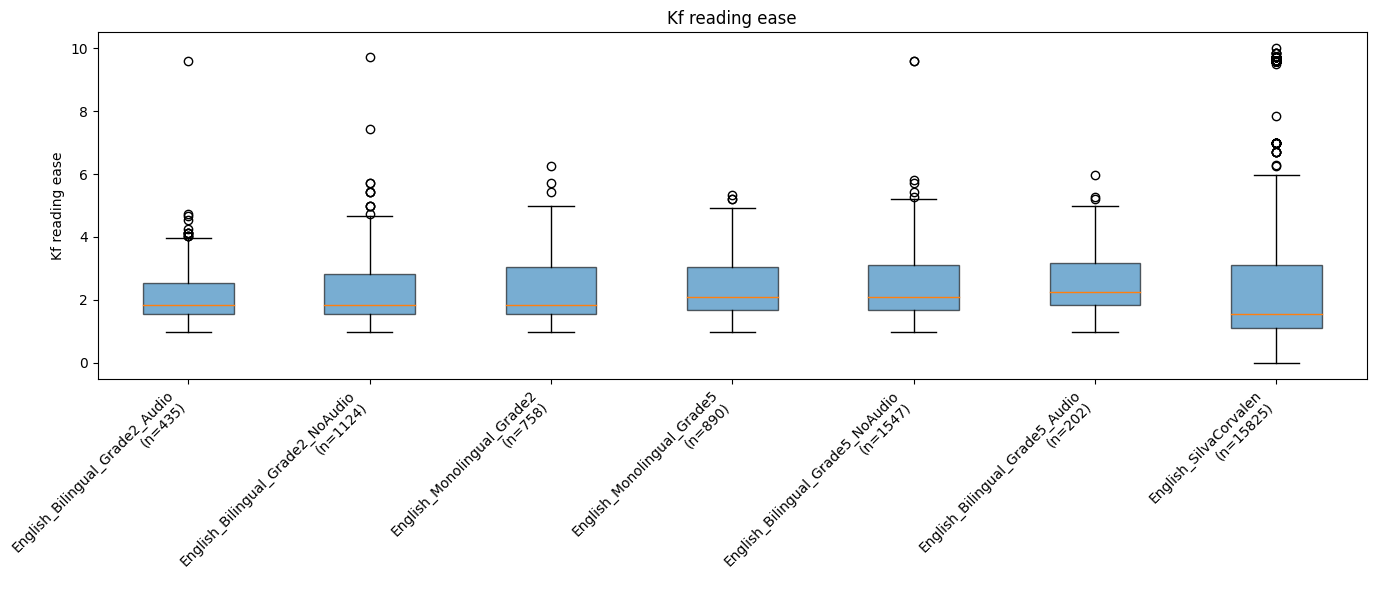

In [123]:
# sort groups by mean (or median if you prefer)
order = sorted(groups, key=lambda x: x[1].mean(), reverse=False)
labels = [o[0] for o in order]
data = [o[1] for o in order]
counts = [len(d) for d in data]

fig, ax = plt.subplots(figsize=(14, 6))
b = ax.boxplot(data, labels=[f"{lab}\n(n={n})" for lab, n in zip(labels, counts)],
                patch_artist=True, showfliers=True)

# style boxes
for patch in b['boxes']:
    patch.set_facecolor('C0')
    patch.set_alpha(0.6)
ax.set_ylabel("Kf reading ease")
ax.set_title("Kf reading ease")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [10]:
def parse_dataset(ds):
    parts = ds.split('_')
    info = {}
    
    # splitting bilinguals from monolinguals
    if 'Bilingual' in parts:
        info['group'] = 'bilingual'
    elif 'Monolingual' in parts:
        info['group'] = 'monolingual'
    else:
        info['group'] = 'unknown'
    
    # splitting spanish and english
    if 'English' in parts:
        info['language'] = 'English'
    elif 'Spanish' in parts or 'Spanish' in ds:
        info['language'] = 'Spanish'
    else:
        info['language'] = 'Unknown'
    
    # In case we wanna see results by age
    age_part = [p for p in parts if p.startswith('Age')]
    if age_part:
        age_str = age_part[0].replace('Age', '')
        try:
            info['age_years'] = float(age_str)
        except ValueError:
            info['age_years'] = np.nan
    else:
        info['age_years'] = np.nan
    
    return pd.Series(info)

meta = data_df['dataset'].apply(parse_dataset)
data_df = pd.concat([data_df, meta], axis=1)

In [11]:
data_df.head()

,dataset,filename,kf_ease_avg,spache_avg,kf_ease,spache_ease,kf_ease_total_avg,spache_ease_total_avg,plain_utterances,plain_utterances_str,group,language,age_years
0,English_Bilingual_Grade2_Audio,11221425.cha,102.705322,2.341721,"[103.625, 115.13000000000002, 103.54, 116.1450...","[3.1089999999999995, 1.8259999999999998, 1.966...",100.527452,2.591364,['the boy and the dog were looking at the frog...,the boy and the dog were looking at the frog ....,bilingual,English,NaN
1,English_Bilingual_Grade2_Audio,11222222.cha,108.029452,2.044024,"[117.16000000000003, 103.70000000000002, 103.0...","[1.544, 2.1079999999999997, 3.0545714285714287...",106.310333,2.093089,"['the boy went to sleep .', 'and the frog jump...",the boy went to sleep . and the frog jumped ou...,bilingual,English,NaN
2,English_Bilingual_Grade2_Audio,11222306.cha,103.385723,2.438240,"[103.00500000000001, 103.04428571428575, 103.7...","[3.2476666666666665, 3.0545714285714287, 2.107...",100.953344,2.554833,['one night the boy and the dog were looking a...,one night the boy and the dog were looking at ...,bilingual,English,NaN
3,English_Bilingual_Grade2_Audio,12122227.cha,103.648944,1.829590,"[103.04428571428575, 92.965, 95.165, 92.965, 9...","[3.0545714285714287, 1.9669999999999999, 2.248...",99.268321,2.119970,"['the dog and the boy is sleeping .', 'the fro...",the dog and the boy is sleeping . the frog is ...,bilingual,English,NaN
4,English_Bilingual_Grade2_Audio,12222013.cha,107.743664,1.771739,"[118.17500000000001, 111.07000000000002, 90.99...","[1.403, 2.3899999999999997, 4.128666666666667,...",105.529574,1.964895,"['there was this boy .', ""he got a a pet that'...",there was this boy . he got a a pet that's POS...,bilingual,English,NaN


In [12]:
# English info
df_en = data_df[
    (data_df["language"] == "English") &
    (data_df["group"].isin(["monolingual", "bilingual"]))
].copy()

df_en_mono = df_en[df_en["group"] == "monolingual"]["kf_ease_avg"].dropna()
df_en_bi   = df_en[df_en["group"] == "bilingual"]["kf_ease_avg"].dropna()

print("N English monolingual:", len(df_en_mono))
print("N English bilingual:", len(df_en_bi))

N English monolingual: 48
N English bilingual: 99


In [13]:
comparison_en = pd.DataFrame({
    "Group": ["English Monolingual", "English Bilingual"],
    "N samples": [len(df_en_mono), len(df_en_bi)],
    "Mean": [df_en_mono.mean(), df_en_bi.mean()],
    "Std": [df_en_mono.std(), df_en_bi.std()]
})
comparison_en

,Group,N samples,Mean,Std
0,English Monolingual,48,103.993825,4.056262
1,English Bilingual,99,102.628698,3.815881


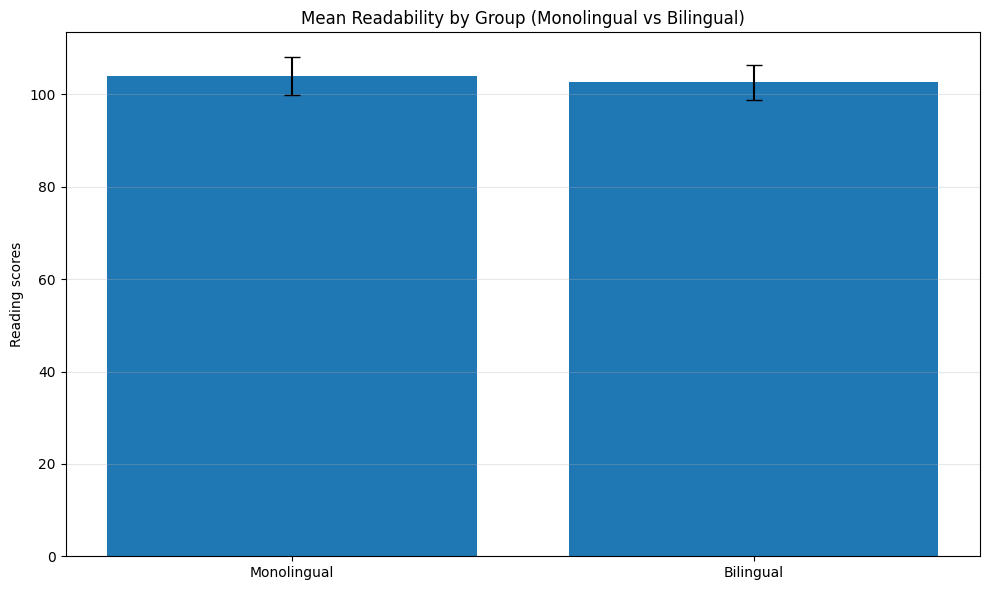

In [17]:
groups = ["Monolingual", "Bilingual"]
means = [
    df_en_mono.mean(),
    df_en_bi.mean(),
]
stds = [
    df_en_mono.std(),
    df_en_bi.std(),
]

plt.figure(figsize=(10,6))
bars = plt.bar(groups, means, yerr=stds, capsize=6)

plt.ylabel("Reading scores")
plt.title("Mean Readability by Group (Monolingual vs Bilingual)")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



In [ ]:
# simnple t-test and effect size
def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.std()**2 + b.std()**2)/2)

def print_group_stats(name, group1, group2):
    t_res = ttest_ind(group1, group2, equal_var=False)
    d = cohens_d(group1, group2)

    print(f"\n{name}")
    print(f"t-test:        t = {t_res.statistic:.3f}, p = {t_res.pvalue:.3e}")
    print(f"Cohen's d:     d = {d:.3f}")

print_group_stats("English tests", df_en_mono, df_en_bi)



English tests
t-test:        t = 1.950, p = 5.430e-02
Cohen's d:     d = 0.347


# SilvaCorvalen testing

In [139]:
# filter rows where dataset equals 'English_SilvaCorvalen'
ds_silva = data_df[data_df['dataset'] == 'English_SilvaCorvalen']
ds_silva = ds_silva.copy()
ds_silva['is_frog'] = ds_silva['filename'].str.contains('frog', case=False, na=False)

grouped_by_frog = ds_silva.groupby('is_frog').agg(
    n_files=('filename', 'size'),
    mean_kf=('kf_ease_avg', 'mean'),
    std_kf=('kf_ease_avg', 'std'),
    mean_spache=('spache_avg', 'mean'),
    std_spache=('spache_avg', 'std')
)

print(grouped_by_frog)

         n_files    mean_kf    std_kf  mean_spache  std_spache
is_frog                                                       
False         11  94.350705  3.236905     2.593937    0.230703
True           6  96.999645  4.243707     2.642522    0.494280
